<a href="https://colab.research.google.com/github/Ruqyai/publish/blob/master/StyleGAN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Change run time type to GPU</h1>


![alt text](https://i.stack.imgur.com/Pr6iZ.png)



---



#StyleGAN


---



![alt text](https://pic1.zhimg.com/v2-9d5a8925ad9dae75dd95f0b069b634ac_1200x500.jpg)

clone the repository below

In [0]:
!git clone https://github.com/NVlabs/stylegan.git

Cloning into 'stylegan'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.


In [0]:
import sys  # using when you have a folder and you want to import the file located in that directory
sys.path.insert(0, "/content/stylegan")

In [0]:
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

"""Minimal script for generating an image using pre-trained StyleGAN generator."""

import os # portable way of using operating system dependent functionality
import pickle # load/serializing and de-serializing/converted into a byte stream
import numpy as np # handling the multi-dimentional arrays and matrixs 
import PIL.Image # Open, rotate, and display an image 
import dnnlib
import dnnlib.tflib as tflib
import config

def main():
    # Initialize TensorFlow.
    tflib.init_tf()

    # Load pre-trained network.
    url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
    with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
        _G, _D, Gs = pickle.load(f)

        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

    # Print network details.
     
    print('-------------  Gs ----------')
    Gs.print_layers()
    print('-------------  _G  ----------')
    _G.print_layers() 
    print('-------------  _D  ----------')
    _D.print_layers()
   

    # Pick latent vector.
    rnd = np.random.RandomState()  #  called z in the picture above
  
    latents = rnd.randn(1, Gs.input_shape[1]) # try change to    _G.input_shape[1]
  
    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt) # try change to     _G.run
  
    # Save image.
    os.makedirs(config.result_dir, exist_ok=True) # creat folder results
    png_filename = os.path.join(config.result_dir, f'example.png')
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

if __name__ == "__main__":
    main()














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
-------------Gs----------

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (51

<h2> Display the image</h2>

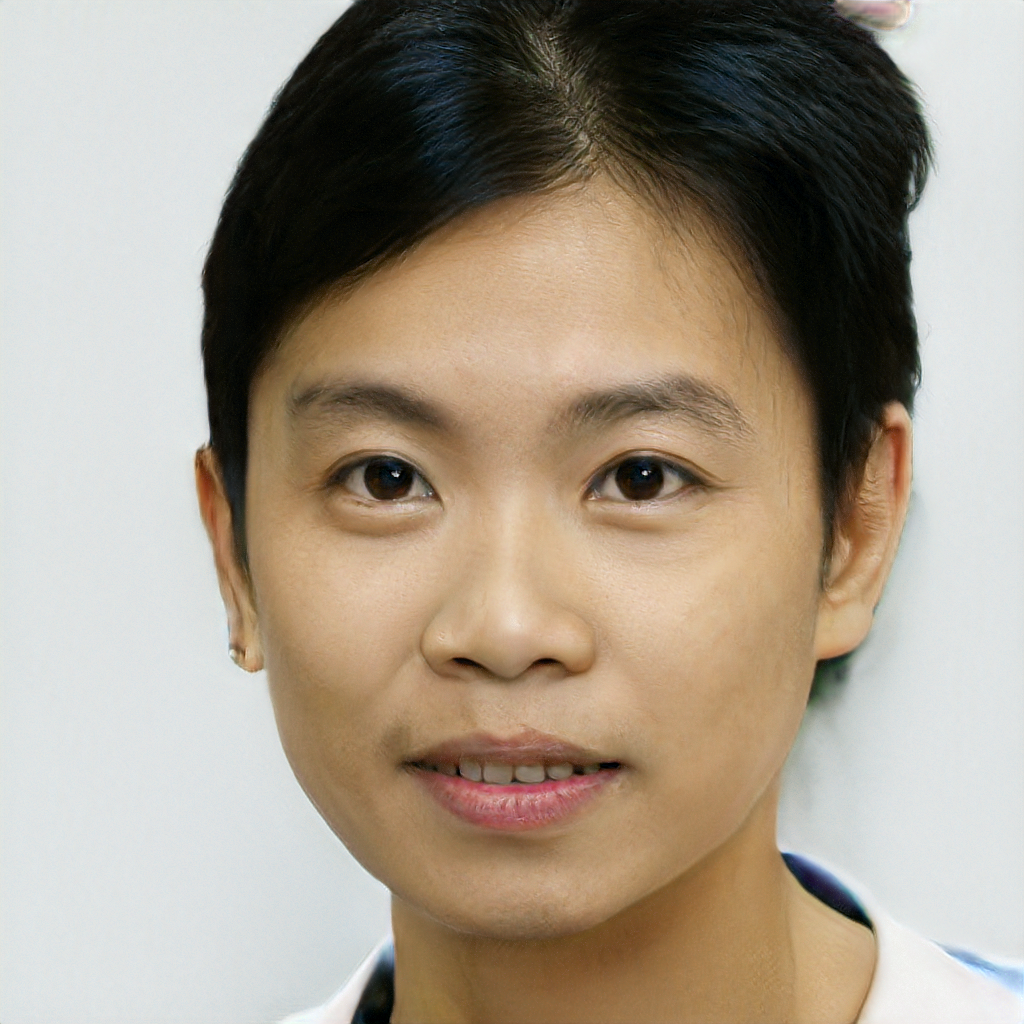

In [0]:
from IPython.display import Image
Image('/content/results/example.png')

#Enjoy by browse this website
#[This Person Does Not Exist.](https://thispersondoesnotexist.com/)